In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

citydata_df = pd.read_csv(city_data)
ridedata_df = pd.read_csv(ride_data)

In [91]:
ridedata_df.head()


city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673

In [92]:
citydata_df.head()



city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban

In [93]:
#clean data into new dataset
average_ride_cost = round(ridedata_df.groupby('city')['fare'].mean(),2)
number_of_rides = ridedata_df.groupby('city')['fare'].count()
total_fares = ridedata_df.groupby('city')['fare'].sum()
city = ridedata_df['city'].unique()
clean_ridedata = pd.DataFrame({'city':city,'Fare Sales':total_fares,'Number of Rides':number_of_rides,'Average Ride':average_ride_cost})

clean_ridedata= clean_ridedata[['city','Number of Rides','Fare Sales','Average Ride']]



In [94]:
#merge clean_data set with fixed values 

merged_df = pd.merge(clean_ridedata,citydata_df,how='left', on='city')
merged_df = merged_df.rename(columns={'city':'City','driver_count':'Number of Drivers','type':'Type of City'})

merged_df['Fare Sales']=pd.to_numeric(merged_df['Fare Sales'])
merged_df['Average Ride']=pd.to_numeric(merged_df['Average Ride'])


merged_df.head(50)


City  Number of Rides  Fare Sales  Average Ride  \
0            Sarabury               31      741.79         23.93   
1           South Roy               26      535.85         20.61   
2         Wiseborough                9      335.84         37.32   
3         Spencertown               22      519.75         23.62   
4          Nguyenbury               19      417.65         21.98   
5         New Jeffrey               31      778.30         25.11   
6       Port Johnstad               15      505.67         33.71   
7           Jacobfort               10      366.06         36.61   
8         Travisville               29      736.47         25.40   
9          Sandymouth               12      372.62         31.05   
10    New Andreamouth               11      380.51         34.59   
11      New Christine               21      482.54         22.98   
12        Stewartview               25      537.43         21.50   
13     Rodriguezburgh               13      408.41         31.42   
14   West Sydneyhaven               22      575.72         26.17   
15        Swansonbury               28      685.39         24.48   
16           Lisatown               19      619.39         32.60   
17          East Erin               11      370.27         33.66   
18    Port Martinberg               10      390.53         39.05   
19        Edwardsbury                7      232.71         33.24   
20        Pamelahaven               27      725.67         26.88   
21         Fosterside                8      240.35         30.04   
22        West Alexis               19      484.10         25.48   
23        Carrollfort               10      323.10         32.31   
24          New David               24      552.83         23.03   
25       Williamshire                9      288.02         32.00   
26        Torresshire                4       85.93         21.48   
27          New Aaron                6      192.04         32.01   
28         Kelseyland               31      768.16         24.78   
29     Lake Sarashire               12      333.98         27.83   
30        Pearsonberg               18      596.98         33.17   
31       Aprilchester               18      517.55         28.75   
32  South Josephville               19      459.22         24.17   
33          Davistown               28      610.58         21.81   
34   Lake Jeffreyland               10      369.28         36.93   
35      Port Samantha               27      619.57         22.95   
36         Smithhaven                6      209.88         34.98   
37   West Jefferyfurt               16      498.68         31.17   
38     Zimmermanmouth               17      506.45         29.79   
39           Eriktown               25      683.37         27.33   
40        Kellershire               25      633.74         25.35   
41         Alyssaberg               22      585.42         26.61   
42      Lake Jennaton               21      517.81         24.66   
43        West Brandy               23      511.18         22.23   
44         West Oscar               28      796.01         28.43   
45         Arnoldview                1       49.62         49.62   
46        South Louis                9      274.49         30.50   
47          Lisaville               21      563.73         26.84   
48       New Maryport                4      174.13         43.53   
49      West Dawnfurt               21      619.93         29.52   

    Number of Drivers Type of City  
0                  46        Urban  
1                  35        Urban  
2                  55        Urban  
3                  68        Urban  
4                   8        Urban  
5                  58        Urban  
6                  22        Urban  
7                  52        Urban  
8                  37        Urban  
9                  11        Urban  
10                 42        Urban  
11                 22        Urban  
12                 49        Urban  
13                 52        U

In [113]:
#bubble chart

#create filtered df for each city type
city_urban = merged_df.loc[merged_df['Type of City']== 'Urban']
city_suburban = merged_df.loc[merged_df['Type of City']== 'Suburban']
city_rural = merged_df.loc[merged_df['Type of City']== 'Rural']


#urban scatter plot

x_axis = city_urban['Number of Rides']
y_axis = city_urban['Average Ride']
scalar = merged_df['Number of Drivers']
urban_plot=plt.scatter(x_axis,y_axis, marker='o', facecolors = 'red',s=scalar, alpha= .75)

#suburban scatter plot
x_axis_1 = city_suburban['Number of Rides']
y_axis_1 = city_suburban['Average Ride']
suburban_plot=plt.scatter(x_axis_1,y_axis_1, marker='o', facecolors = 'lightblue',s=scalar, alpha= .75,)

#rural scatter plot
x_axis_2 = city_rural['Number of Rides']
y_axis_2 = city_rural['Average Ride']
rural_plot =plt.scatter(x_axis_2,y_axis_2, marker='o', facecolors = 'orange',s=scalar, alpha= .75)


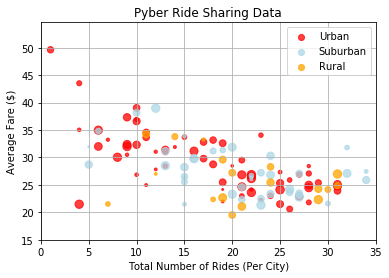

In [114]:
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylim(15,max(merged_df['Average Ride']) + 5)
plt.xlim(0,max(merged_df['Number of Rides']) + 1)
plt.legend((urban_plot,suburban_plot,rural_plot),
           ('Urban','Suburban','Rural'), 
           loc = "best")
plt.grid(True)
sns.axes_style(style='darkgrid')
plt.show()

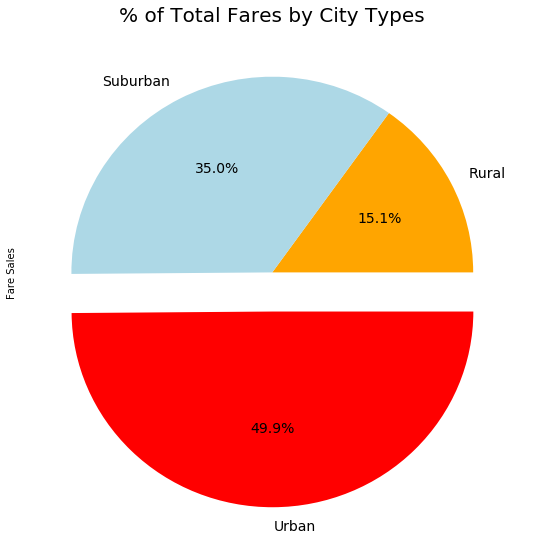

In [118]:

#percentage of total fares by city types
total_fares_by_city = merged_df.groupby('Type of City')['Fare Sales'].sum()

colors = ['orange','lightblue','red']
explode = (0,0,.2)
piechart_percentage_totalridesbycity = total_fares_by_city.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14)

piechart_percentage_totalridesbycity.set_title("% of Total Fares by City Types", fontsize = 20)
plt.show()


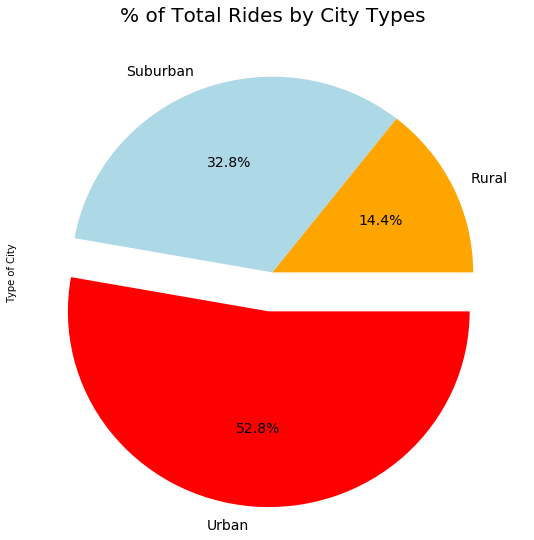

In [108]:
#%  of total rides by city types
type_group = merged_df.groupby('Type of City')
count_groupbyrides = type_group['Type of City'].count()
count_groupbyrides
colors = ['orange','lightblue','red']
explode = (0,0,.2)
piechart_percentage_totalrides = count_groupbyrides.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14)

piechart_percentage_totalrides.set_title("% of Total Rides by City Types", fontsize = 20)
plt.show()

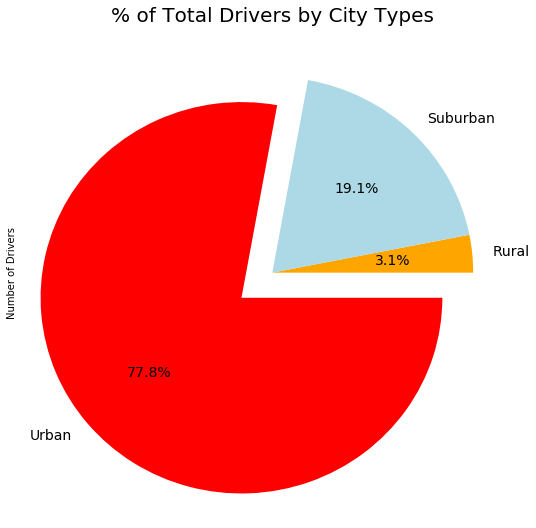

In [119]:
#percentage of total drivers by city types pie graph
total_drivers_by_citytype = merged_df.groupby('Type of City')['Number of Drivers'].sum()
colors = ['orange','lightblue','red']
explode = (0,0,.2)
piechart_percentage_totaldrivers_by_city = total_drivers_by_citytype.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14)

piechart_percentage_totaldrivers_by_city.set_title("% of Total Drivers by City Types", fontsize = 20)
plt.show()